# 1) Data PreProcessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.tsv', sep = '\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


### We need to do a binary classification between Ham and Spam.

Lets do some basic data analysis and exploration.

In [4]:
df.isna().sum() 
#The isna() method returns a DataFrame object where all the values are replaced with a Boolean value 
#True for NA (not-a -number) values, and otherwise False.
#here will try to sum up the TRUE or FALSE value of all the features Like label, message etc.

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
df['label'].value_counts()/len(df)*100 # gives in percentage result

ham     86.593683
spam    13.406317
Name: label, dtype: float64

We will try to equivalence the data set as the Ham part is significantly more than spam part. It will be beneficial for the training.

## Balancing of Data Set

In [9]:
#we will try to discard the messeges from Ham Category
ham = df[df["label"] == 'ham']
spam = df[df["label"] == 'spam']

In [10]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [11]:
ham = ham.sample(spam.shape[0]) 
#we use sample function to choose no of samples from ham = no. of rows in spam

In [12]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [13]:
data = ham.append(spam, ignore_index = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29072\2464737184.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index = True)


In [14]:
data.shape

(1494, 4)

In [15]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [16]:
data.head()

,label,message,length,punct
0,ham,"Mostly sports type..lyk footbl,crckt..",38,5
1,ham,Sent me de webadres for geting salary slip,42,0
2,ham,And smile for me right now as you go and the w...,145,5
3,ham,Don know..he is watching film in computer..,43,4
4,ham,"I've got &lt;#&gt; , any way I could pick up?",46,8


# 2) Data Exploration

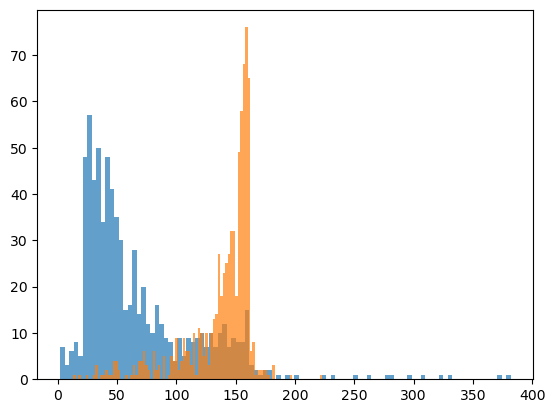

In [17]:
#We try to perform a viz for Ham cateogory through Histogram
plt.hist(data[data["label"] == 'ham']['length'], bins = 100,  alpha = 0.7)
plt.hist(data[data["label"] == 'spam']['length'], bins = 100,  alpha = 0.7)
plt.show()

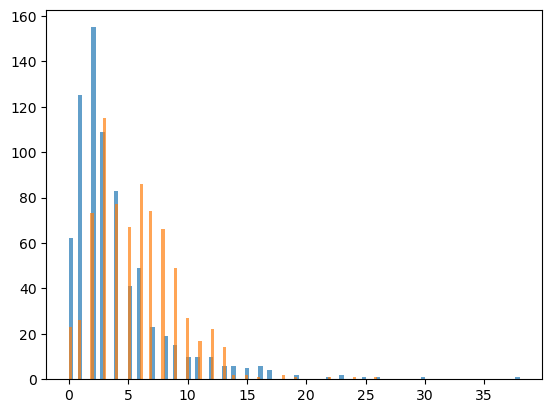

In [18]:
plt.hist(data[data["label"] == 'ham']['punct'], bins = 100,  alpha = 0.7)
plt.hist(data[data["label"] == 'spam']['punct'], bins = 100,  alpha = 0.7)
plt.show()

Here we can see that the higher spam probabilty is at Longer length of Sentences though there are some long ham messages as well.

Considering histogram of the punctuation feature we dont really get much insights from it.

# 3) Data Split into Training and Testing

We are going to apply supervised learning model for our classification job. For that as we know, supervised learning model needs some amount of training data(pre-defined output or Labelled Data) to test the rest of the data.

Never ever use testing dataset for model training because to check accuracy of the model.

In [19]:
data

,label,message,length,punct
0,ham,"Mostly sports type..lyk footbl,crckt..",38,5
1,ham,Sent me de webadres for geting salary slip,42,0
2,ham,And smile for me right now as you go and the w...,145,5
3,ham,Don know..he is watching film in computer..,43,4
4,ham,"I've got &lt;#&gt; , any way I could pick up?",46,8
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


We are considering 70% of the data set for Training purpose bucket and rest 30% for the testing purpose bucket.

In [20]:
from sklearn.model_selection import train_test_split

The train_test_split model will return 4 values so we need to assign 4 variables to it.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state = 0, shuffle = True)

In [22]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1045,), (1045,), (449,), (449,))

# 4) Application of Random Forest Model

We can not directly apply the text datas into ML model. For that we need convert them into numbers.

The conversion should be in such a way that the semantic relationships are valid. So we can use a encoder called TF-IDF or Term frequency-Inverse Document Frequency model. https://monkeylearn.com/blog/what-is-tf-idf/

In [23]:
#import tf-idf, Random Forest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

#create pipeline object
from sklearn.pipeline import Pipeline

we will pass both the vectorizer and random forest classifier into a pipeline object so that we can use it together

In [24]:
classifier = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", RandomForestClassifier(n_estimators = 100))])

In [25]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

# 5) Prediction of Random Forest Results

In [26]:
y_pred = classifier.predict(x_test)

In [27]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam',
        'ham', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham',
        'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
        'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham',
        'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
        'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spa

Accuracy testing by either getting entire report or basic percentage value or in form of Confuision Matrix.

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn import metrics

In [29]:
accuracy_score(y_test, y_pred)

0.9532293986636972

In [30]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)

The confusion matrix dictates that in the major diagonal elements are the one those are correctly detected. The off diagonal sum is the ones it could not.

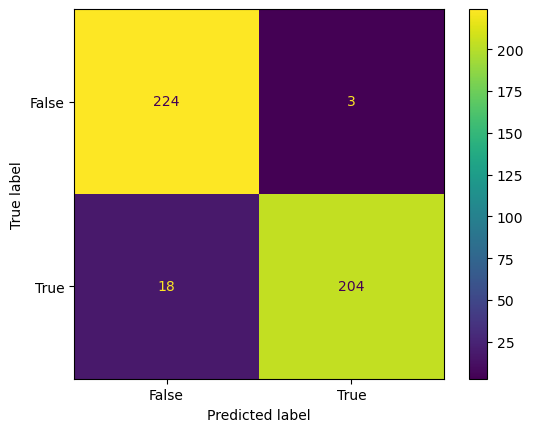

In [31]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       227
        spam       0.99      0.92      0.95       222

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.96      0.95      0.95       449



# 6) Application of Support Vector Machine

In [33]:
from sklearn.svm import SVC

In [34]:
svm = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", SVC(C =100, gamma = 'auto'))])

In [35]:
svm.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

# 7) Prediction of SVM Results

In [36]:
y_pred = svm.predict(x_test)

In [37]:
y_pred

array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
       'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
       'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
       'spam', 'ham', 'spam', 'ham', 'ham', 

In [38]:
accuracy_score(y_test, y_pred)

0.9465478841870824

In [39]:
cm2 = confusion_matrix(y_test,y_pred)

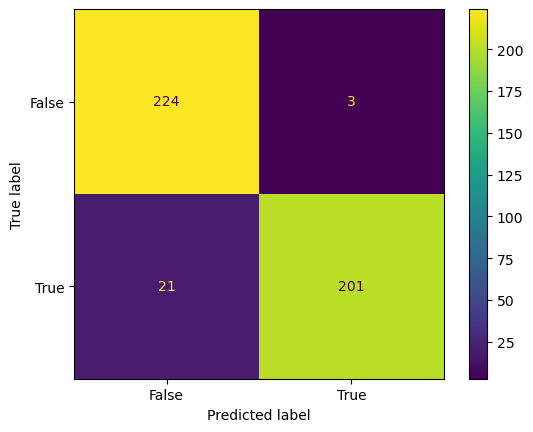

In [40]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = [False, True])

cm_display.plot()
plt.show()

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       227
        spam       0.99      0.91      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



# 8) Predict Testing Data with Both the Models

In [42]:
test1 = ['Hello, You are studying in IIT Dhanbad']
test2 = ['Hope I will do good and learn a lot of things from here']
test3 = ['Congratulations, You have won a lottery worth $1 Million! To claim call on 354758']
test4 = ['Your banck account has been decativated! Click on the link www.hrtsyr#$fgj.com to complete KYC']

In [43]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))
print(classifier.predict(test4))

['ham']
['ham']
['spam']
['spam']


In [44]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))
print(svm.predict(test4))

['ham']
['ham']
['spam']
['spam']


In [45]:
test1 = ['Hello, Meenakshi banerjee is my beautiful wife']
test2 = ['You are being selected for this job in USA!! which have salary of $10000000!!. Click this link to apply']

In [46]:
print(svm.predict(test1))
print(svm.predict(test2))

['ham']
['spam']


In [47]:
print(classifier.predict(test1))
print(classifier.predict(test2))

['ham']
['ham']
